#Ajustes al modelo RLM de las bikes

# Modelos NO-Lineales: Polinomial, Logaritmo y sus Residuos.


# Particiones, normalización de variables independientes y R2_ajustada en conjunto de prueba.

https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset


In [ ]:
import numpy as np    # biblioteca para el manejo de vectores y matrices en python.
import pandas as pd   # biblioteca para el manejo de datos y tablas.
import matplotlib.pyplot as plt   # biblioteca para visualización de datos.
import statsmodels.api as sm      # biblioteca para pruebas estadísticas.
import seaborn as sns # biblioteca para visualización estadística.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
mypath = "/content/drive/My Drive/data/bike/day.csv" 

In [6]:
mydata = pd.read_csv(mypath)
mydata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
mydata.shape

(731, 16)

### Resumen numérico de las variables y vemos que sí se requerirá transformarlos porque están en muy diferentes escalas:

In [8]:
mydata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Nos quedamos con las variable que ya sabemos no están muy correlacionadas y lo corroboramos con la matriz de correlación: 

In [9]:
dataset = pd.DataFrame(mydata[["atemp","cnt"]])

In [10]:
dataset.corr(method='pearson')

,atemp,cnt
atemp,1.000000,0.631066
cnt,0.631066,1.000000


# Resumen descriptivo de las variables:

In [11]:
dataset.describe()

,atemp,cnt
count,731.000000,731.000000
mean,0.474354,4504.348837
std,0.162961,1937.211452
min,0.079070,22.000000
25%,0.337842,3152.000000
50%,0.486733,4548.000000
75%,0.608602,5956.000000
max,0.840896,8714.000000


In [12]:
x = dataset["atemp"]
y = dataset["cnt"]

## Gráficas de dispersión con la variable dependiente (cnt):

In [13]:
sns.set(rc={'figure.figsize':(6,5)})   # (width, height)

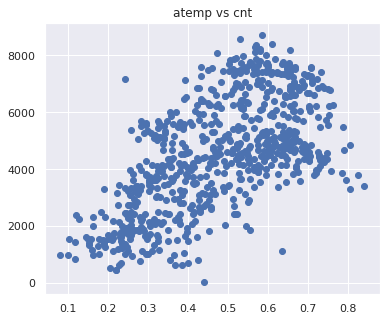

In [14]:
plt.scatter(x,y)
plt.title("atemp vs cnt")
plt.show()

### Primer modelo a analizar:

In [15]:
print(x.shape)
print(y.shape)

(731,)
(731,)


## Modelos de regresión lineal simple:

In [16]:
xones = sm.add_constant(x)

In [17]:
mimodelo = sm.OLS(y, xones).fit()

In [18]:
print(mimodelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     482.5
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           1.85e-82
Time:                        23:33:44   Log-Likelihood:                -6384.0
No. Observations:                 731   AIC:                         1.277e+04
Df Residuals:                     729   BIC:                         1.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        945.8240    171.291      5.522      0.0

In [19]:
pendiente = mimodelo.params[1]
ordenada = mimodelo.params[0]

In [20]:
ygorro = x * pendiente + ordenada

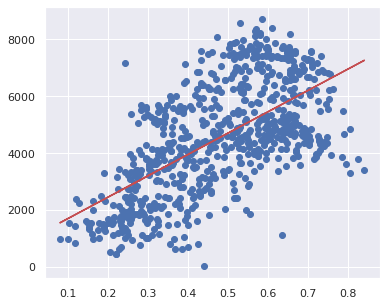

In [21]:
plt.plot(x, ygorro, color='r')
plt.scatter(x,y)
plt.show()

In [22]:
sse = np.sum(np.square( y - ygorro ))
print(sse)
print(sse / len(y))  # mse

1648532085.3164074
2255173.851322035


In [23]:
y_gorro = mimodelo.predict(xones)   # o bien...
sse1 = np.sum(np.square( y - y_gorro ))
print(sse1)

1648532085.3164074


# Modelo NO-Lineal - cuadrática

In [24]:
xones2 = xones.copy()   # observa que debes copiar la variable de esta manera para que sean independientes.
xones2["nonlin2"] = np.square(xones2["atemp"])

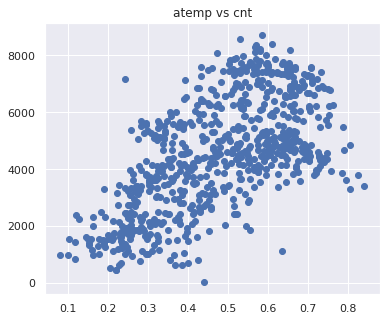

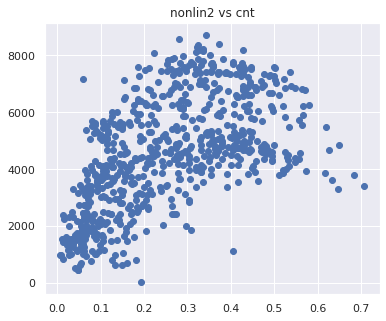

In [26]:
plt.scatter(xones2["atemp"],y)
plt.title("atemp vs cnt")
plt.figure()
plt.scatter(xones2["nonlin2"],y)
plt.title("nonlin2 vs cnt")
plt.show()

In [28]:
xones2.head()

,const,atemp,nonlin2
0,1.0,0.363625,0.132223
1,1.0,0.353739,0.125131
2,1.0,0.189405,0.035874
3,1.0,0.212122,0.044996
4,1.0,0.229270,0.052565


In [29]:
mimodelo2 = sm.OLS(y, xones2).fit()
print(mimodelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     296.5
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           6.41e-95
Time:                        23:35:25   Log-Likelihood:                -6351.9
No. Observations:                 731   AIC:                         1.271e+04
Df Residuals:                     728   BIC:                         1.272e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2155.0969    413.033     -5.218      0.0

In [30]:
y_gorro2 = mimodelo2.predict(xones2)   
sse1 = np.sum(np.square( y - y_gorro2 ))
print(sse1 / len(y))

2065322.1714365936


Vemos que el MSE cuadrático es menor que el MSE del modelo solo lineal: 2'255,173.8

#Ahora un cúbico ...

In [31]:
xones3 = xones2.copy()
xones3["nonlin3"] = np.square(xones3["atemp"]) * xones3["atemp"]

In [32]:
xones3.head()

,const,atemp,nonlin2,nonlin3
0,1.0,0.363625,0.132223,0.048080
1,1.0,0.353739,0.125131,0.044264
2,1.0,0.189405,0.035874,0.006795
3,1.0,0.212122,0.044996,0.009545
4,1.0,0.229270,0.052565,0.012052


Vemos que mejorará el R2_ajuste pero a costa de ser ahorna no significativos la ordenada en el origen y la lineal de atemp, lo cual para predicciones no nos ayudará... así que mejor nos quedaremos con el modelo cuadrático únicamente.

In [35]:
mimodelo3 = sm.OLS(y, xones3).fit()
print(mimodelo3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     210.5
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           2.90e-98
Time:                        23:36:30   Log-Likelihood:                -6341.2
No. Observations:                 731   AIC:                         1.269e+04
Df Residuals:                     727   BIC:                         1.271e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1270.4218    840.760      1.511      0.1

#... más adelante hay que comparar los MSE pero con los datos de validación o los de prueba.

In [36]:
y_gorro3 = mimodelo3.predict(xones3)   
sse3 = np.sum(np.square( y - y_gorro3 ))
print(sse3 / len(y))

2005488.5919332055


# Modelo no-lineal Logaritmo:

In [37]:
xones4 = xones.copy()
xones4["nonlinlog"] = np.log(xones4["atemp"])

In [38]:
xones4

,const,atemp,nonlinlog
0,1.0,0.363625,-1.011632
1,1.0,0.353739,-1.039196
2,1.0,0.189405,-1.663868
3,1.0,0.212122,-1.550594
4,1.0,0.229270,-1.472855
...,...,...,...
726,1.0,0.226642,-1.484384
727,1.0,0.255046,-1.366311
728,1.0,0.242400,-1.417166
729,1.0,0.231700,-1.462312


### Veamos este modelo no-lineal...

In [39]:
mimodelo4 = sm.OLS(y, xones4).fit()
print(mimodelo4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     270.8
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           1.20e-88
Time:                        23:37:10   Log-Likelihood:                -6366.4
No. Observations:                 731   AIC:                         1.274e+04
Df Residuals:                     728   BIC:                         1.275e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8034.6334   1193.184      6.734      0.0

In [40]:
y_gorro4 = mimodelo4.predict(xones4)   
sse4 = np.sum(np.square( y - y_gorro4 ))
print(sse4 / len(y))

2148896.418192861


# Veamos entonces puro logaritmo:

In [41]:
xones5 = xones.copy()
xones5["nonlinlog"] = np.log(xones["atemp"])
xones5 = xones5.drop(["atemp"], axis=1)

In [42]:
xones5

,const,nonlinlog
0,1.0,-1.011632
1,1.0,-1.039196
2,1.0,-1.663868
3,1.0,-1.550594
4,1.0,-1.472855
...,...,...
726,1.0,-1.484384
727,1.0,-1.366311
728,1.0,-1.417166
729,1.0,-1.462312


### Se obtiene un resultado de R2_aj análogo. Es mejor que la lineal inicial, pero no mejor que la cuadrática.

In [43]:
mimodelo5 = sm.OLS(y, xones5).fit()
print(mimodelo5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     541.3
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           5.64e-90
Time:                        23:38:16   Log-Likelihood:                -6366.7
No. Observations:                 731   AIC:                         1.274e+04
Df Residuals:                     729   BIC:                         1.275e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7084.6678    123.497     57.367      0.0

In [44]:
y_gorro5 = mimodelo5.predict(xones5)   
sse5 = np.sum(np.square( y - y_gorro5 ))
print(sse5 / len(y))

2150787.7367280303


# Veamos ahora R2_ajustada con partición:

## Usaremos el modelo cuadrátio en el ejemplo.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(xones2, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(584, 3) (584,)
(147, 3) (147,)


In [47]:
X_train

,const,atemp,nonlin2
97,1.0,0.324479,0.105287
503,1.0,0.551121,0.303734
642,1.0,0.607975,0.369634
498,1.0,0.585238,0.342504
303,1.0,0.356063,0.126781
...,...,...,...
707,1.0,0.389508,0.151716
192,1.0,0.739275,0.546528
629,1.0,0.571971,0.327151
559,1.0,0.667933,0.446134


In [48]:
mimodelop = sm.OLS(y_train, X_train).fit()
print(mimodelop.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     241.9
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           3.82e-77
Time:                        23:38:40   Log-Likelihood:                -5061.6
No. Observations:                 584   AIC:                         1.013e+04
Df Residuals:                     581   BIC:                         1.014e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1952.8628    450.042     -4.339      0.0

In [49]:
y_gorrop = mimodelop.predict(X_train)   
ssep = np.sum(np.square( y_train - y_gorrop ))
print(ssep / len(y_train))

1975397.9836182036


In [50]:
y_gorrot = mimodelop.predict(X_test)   
sset = np.sum(np.square( y_test - y_gorrot ))
print(sset / len(y_test))

2428586.5967392134


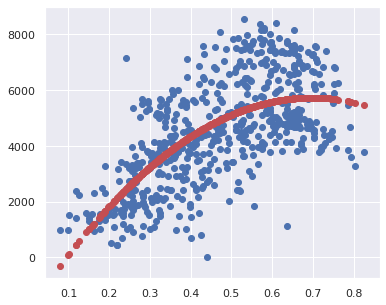

In [51]:
b2 = mimodelop.params[2]
b1 = mimodelop.params[1]
b0 = mimodelop.params[0]
ygorrop =  X_train["nonlin2"] * b2 +  X_train["atemp"] * b1 + b0
plt.plot(X_train["atemp"], ygorrop, 'ro')
plt.scatter(X_train["atemp"],y_train)
plt.show()

# Obtengamos las R2_ajustadas

In [52]:
syyt = np.sum(np.square( y_test - np.mean(y_test) ))
syyt

625211995.3061225

In [53]:
R2test = 1 - sset / syyt
R2test

0.42899011471162607

In [54]:
R2testadj = 1 - (len(y_test)-1) * (1 - R2test) / (len(y_test) - 1 - mimodelop.df_model)
R2testadj

0.4210594218603987

# Gráfica de los Residuos:

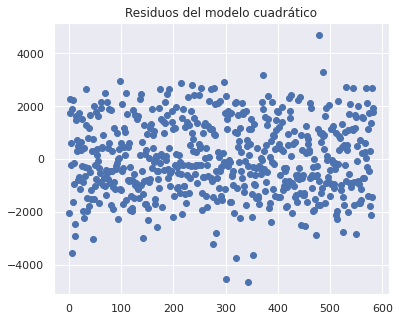

In [55]:
xx = a = [x for x in range(len(y_train))]
epsk = y_train - ygorrop
plt.scatter(xx,epsk)
plt.title("Residuos del modelo cuadrático")
plt.show()

# Modelo Lineal y R2_ajustada

In [56]:
X_trainlin, X_testlin, y_trainlin, y_testlin = train_test_split(xones, y, test_size=0.2, random_state=0)
mimodeloplin = sm.OLS(y_trainlin, X_trainlin).fit()
print(mimodeloplin.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     397.7
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           7.84e-68
Time:                        23:39:16   Log-Likelihood:                -5086.4
No. Observations:                 584   AIC:                         1.018e+04
Df Residuals:                     582   BIC:                         1.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1015.1256    184.787      5.493      0.0

In [57]:
syytlin = np.sum(np.square( y_testlin - np.mean(y_testlin) ))

y_gorrotlin = mimodeloplin.predict(X_testlin)   
ssetlin = np.sum(np.square( y_testlin - y_gorrotlin ))

R2testlin = 1 - ssetlin / syytlin
R2testlin

0.371195182962035

In [58]:
R2testadjlin = 1 - (len(y_testlin)-1) * (1 - R2testlin) / (len(y_testlin) - 1 - mimodeloplin.df_model)
R2testadjlin

0.36685859801694554

In [59]:
b1lin = mimodeloplin.params[1]
b0lin = mimodeloplin.params[0]
ygorroplin =  X_trainlin["atemp"] * b1lin + b0lin

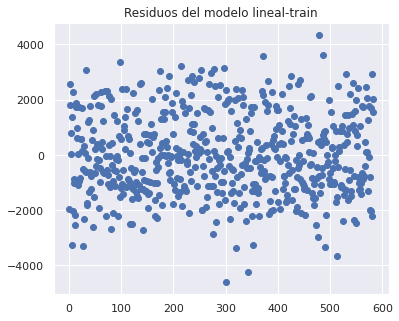

In [60]:
epsklin = y_trainlin - ygorroplin
plt.scatter(xx,epsklin)
plt.title("Residuos del modelo lineal-train")
plt.show()

In [61]:
ssetlin # SSE del modelo lineal

393136314.3184074

In [62]:
sset   # SSE del modelo cuadrático: el cuadrático es más pequeño ;)

357002229.7206644

# Boxplot de los residuos:

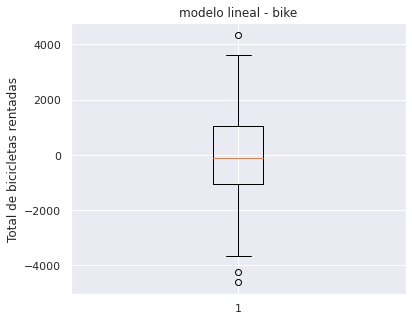

In [63]:
plt.boxplot(epsklin, vert=True)
plt.title("modelo lineal - bike")
plt.ylabel('Total de bicicletas rentadas',fontsize=12)
plt.show()

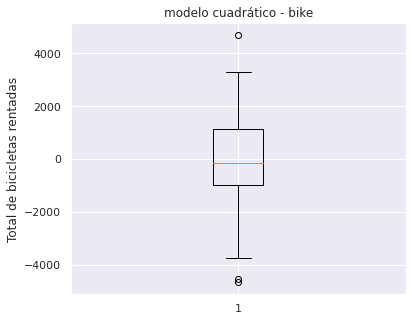

In [64]:
plt.boxplot(epsk, vert=True)
plt.title("modelo cuadrático - bike")
plt.ylabel('Total de bicicletas rentadas',fontsize=12)
plt.show()